In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Idea del analisis: cuantas menos palabras repetidas tiene un texto, mejor esta escrito (utilizazion de sinonimos)

In [36]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [37]:
df['unique_words_count'] = df['text'].apply(lambda x: len(set(str(x).split())))

In [38]:
df

,id,keyword,location,text,target,unique_words_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,20
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,15
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,11
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,17
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,8
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,19


In [39]:
df_unique_mean = df.groupby(['target']).agg({'unique_words_count': 'mean'})
df_unique_mean

,unique_words_count
target,
0,14.096499
1,14.664934


In [42]:
df_unique_mean = df_unique_mean.rename(index={0: 'Not Real', 1: 'Real'}).reset_index()

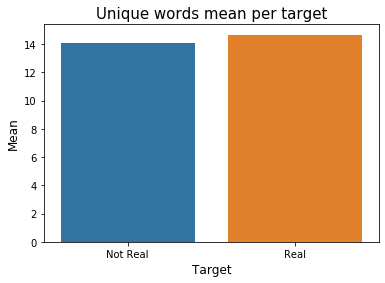

In [43]:
g = sns.barplot(x=df_unique_mean['target'].values, y=df_unique_mean['unique_words_count'].values, orient='v')
g.set_title("Unique words mean per target", fontsize=15)
g.set_xlabel("Target", fontsize=12)
g.set_ylabel("Mean", fontsize=12)
plt.show()

g.get_figure().set_size_inches(18.5, 10.5, forward=True)

## Se cumple (por poco) q en promedio los tweets sobre desastres reales tienen mayor cantidad de palabras únicas

In [44]:
df['unique_words_percentage'] = df['text'].apply(lambda x: len(set(str(x).split())) / len(str(x).split()))

In [45]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

In [46]:
df.groupby(['target']).agg({'unique_words_percentage': 'mean'})

,unique_words_percentage
target,
0,0.968347
1,0.973505


## sin embargo la proporcion de palabras unicas sobre total de palabras es casi la misma para ambos targets